In [1]:
#Tightbinding Library
from typy import *
import numpy as np

In [2]:
#Location of data files
file_path = f"./input/"

In [3]:
#Create tightbinding model
#nscf = QE nscf out data
#wout = W90 out data
#hr = W90 hr data
model = typy(file_path,nscf="nscf.out", wout="NbSe2.wout",hr="NbSe2_hr.dat",shift=0)

In [4]:
# ##Electron band energies in 1d path
path, sym, label= GMKG(1000)
band = np.array(model.parallel_solver(path))

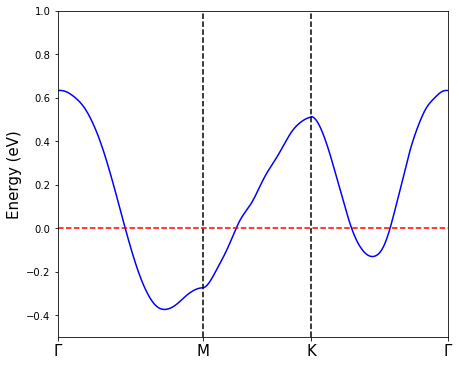

In [5]:
model.plot_electron_path(band,sym,label,ylim=[-0.5,1])

In [34]:
5#Calculation for 2D band dispersion on a given mesh
N=200
mesh = mesh_2d(N)
t_mesh = model.t_mesh(N)
band_2d = np.array(model.parallel_solver(mesh))


In [47]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [67]:
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(90/256, 1, N)
vals[:, 1] = np.linspace(40/256, 1, N)
vals[:, 2] = np.linspace(40/256, 1, N)
newcmp = ListedColormap(vals)


In [80]:
vals = np.ones((5, 4))
vals[0] = 252,228,50,255
vals[1] = 135,161,197,255
vals[2] = 63,82,147,255
vals[3] = 42,73,147,255
vals[4] = 14,27,60,255
newcmp = ListedColormap(vals/255)


In [81]:
vals

array([[252., 228.,  50., 255.],
       [135., 161., 197., 255.],
       [ 63.,  82., 147., 255.],
       [ 42.,  73., 147., 255.],
       [ 14.,  27.,  60., 255.]])

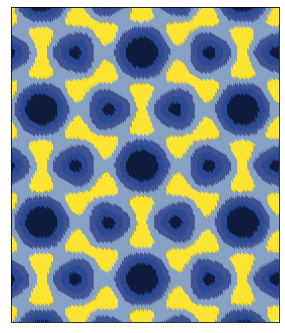

In [83]:
plt.figure(figsize=(2*xlim, 2*ylim))
plt.scatter(t_mesh[0], t_mesh[1], c=band_2d[6], cmap=newcmp)
# plt.colorbar()
xlim, ylim  = 2.4, 2.9
plt.xlim(-xlim,xlim)
plt.ylim(-ylim, ylim)
plt.xticks([])
plt.yticks([])
plt.show()

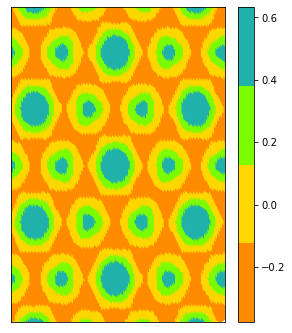

In [55]:
plt.figure(figsize=(2*xlim, 2*ylim))
plt.scatter(t_mesh[0], t_mesh[1], c=band_2d[6], cmap=cmap)
plt.colorbar()
xlim, ylim  = 2.4, 2.9
plt.xlim(-xlim,xlim)
plt.ylim(-ylim, ylim)
plt.xticks([])
plt.yticks([])
plt.show()

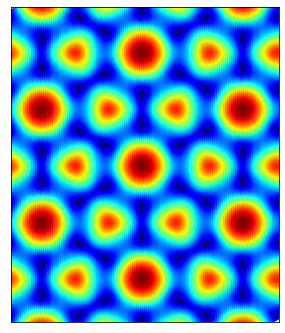

In [38]:
plt.figure(figsize=(2*xlim, 2*ylim))
plt.scatter(t_mesh[0], t_mesh[1], c=band_2d[6], cmap='jet')
# plt.colorbar()
xlim, ylim  = 2.4, 2.9
plt.xlim(-xlim,xlim)
plt.ylim(-ylim, ylim)
plt.xticks([])
plt.yticks([])
plt.show()

In [13]:
def density_of_states(E,dE=1e-2):
    #Initial empty array for dos
    dos = np.zeros(len(E))
    #Iterate over each energy
    for i in range(len(E)):
        #Delta function approxiation for given value of energy over all states
        delta_array = np.where( abs(E[i]-E) < dE , np.ones(len(E)),0)
        delta_average  = np.average(delta_array)
        dos[i] = delta_average
    return dos

In [14]:
#Calculate density of states for the given energy distribution
dos = density_of_states(band_2d[6],9e-3)

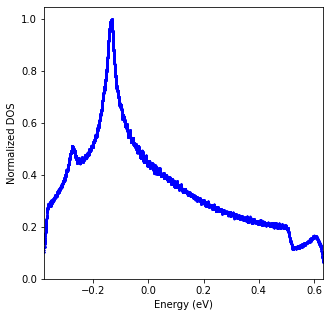

In [15]:
#Plot DOS on energy space
fig = plt.figure(figsize=(5,5))
plt.scatter(band_2d[6],dos/max(dos),s=1,c='blue')
plt.xlabel("Energy (eV)")
plt.ylabel("Normalized DOS")
plt.xlim(min(band_2d[6]),max(band_2d[6]))
plt.ylim(0)
plt.show()

In [16]:
df = pd.DataFrame()
df['E']=band_2d[6]
df['dos']=dos/max(dos)

In [17]:
col = "dos"
max_x = df.loc[df[col].idxmax()]
print ("Maximum value of column ", col, " and its corresponding row values:\n", max_x)


Maximum value of column  dos  and its corresponding row values:
 E     -0.132773
dos    1.000000
Name: 6954, dtype: float64


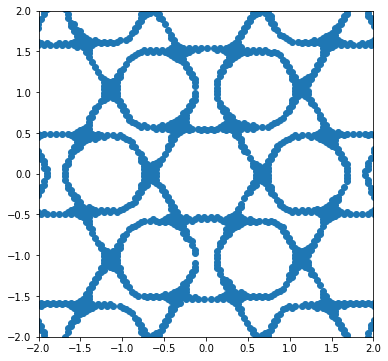

In [20]:
plot_fs(t_mesh,band_2d[6]+0.132773,fs_thickness=0.03)

In [ ]:
# shift_search = linspace(-0.2,-0.1,10)
# for i in shift_search:
#     plot_fs(t_mesh,band_2d[6]-i,fs_thickness=0.01,title=f"δEf = {around(i,3)}")

In [ ]:
suscep = zeros(shape=(len(shift_search),len(path)))

In [ ]:
import os


In [ ]:
int(sym[1]*2/3)

248

In [ ]:
plt.figure(figsize=(7, 6))
arr = []
for filename in os.listdir("export"):
    data = loadtxt(f"./export/{filename}")[int(sym[1]*2/3)]
    arr.append([float(data),float(filename[4:][:-4])])
#     plt.plot(data,label=f"{filename[4:][:-4]} eV")
# plt.xticks(ticks=sym, labels=label, fontsize=15)
# plt.xlim(sym[0], len(band.T))
# plt.axvline(sym[1], c="black", linestyle="--")
# plt.axvline(sym[2], c="black", linestyle="--")
# plt.axvline(sym[1]*2/3, c="red", linestyle="--")
# plt.legend(loc=(1.04,0))
# plt.ylabel("χ [1/eV]")
# plt.show()

<Figure size 504x432 with 0 Axes>

In [ ]:
ar = array(arr)

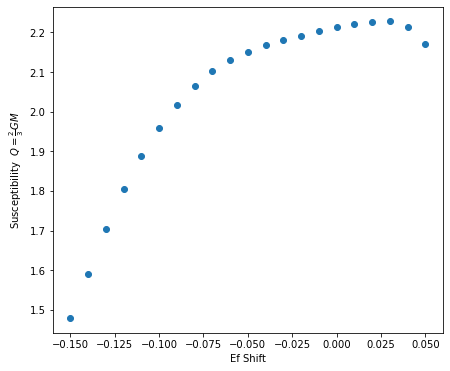

In [ ]:
plt.figure(figsize=(7, 6))
plt.scatter(ar.T[1],ar.T[0])
plt.xlabel("Ef Shift")
plt.ylabel(r"Susceptibility  $Q=\frac{2}{3}GM$")
plt.show()

In [ ]:
array(arr).T[1]

array([-0.1 , -0.12, -0.06, -0.07, -0.13, -0.05, -0.11, -0.04, -0.14,
       -0.15, -0.01, -0.03, -0.02, -0.09, -0.08,  0.04,  0.05,  0.01,
        0.  ,  0.02,  0.03])

In [ ]:
array(arr).T[0]

array([2.29711858, 2.41317478, 2.21154072, 2.21296477, 2.60261284,
       2.20715041, 2.30666476, 2.20263602, 2.73905812, 2.69659533,
       2.21691846, 2.20155652, 2.20650068, 2.29452481, 2.26004828,
       2.21348456, 2.17148427, 2.22157149, 2.22137243, 2.227759  ,
       2.22772261])

In [ ]:
a= around(arange(-0.05,0.05,0.01),3)

In [ ]:
a

array([-0.05, -0.04, -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,
        0.04])

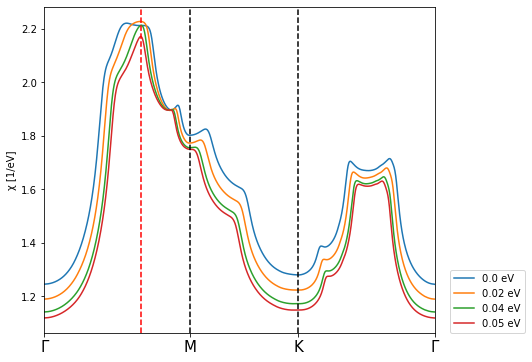

In [26]:
plt.figure(figsize=(7, 6))
for filename in ['sus_0.0.dat','sus_0.02.dat','sus_0.04.dat','sus_0.05.dat']:
    data = loadtxt(f"./export/{filename}")
    plt.plot(data,label=f"{filename[4:][:-4]} eV")
plt.xticks(ticks=sym, labels=label, fontsize=15)
plt.xlim(sym[0], len(band.T))
plt.axvline(sym[1], c="black", linestyle="--")
plt.axvline(sym[2], c="black", linestyle="--")
plt.axvline(sym[1]*2/3, c="red", linestyle="--")
plt.legend(loc=(1.04,0))
plt.ylabel("χ [1/eV]")
plt.show()

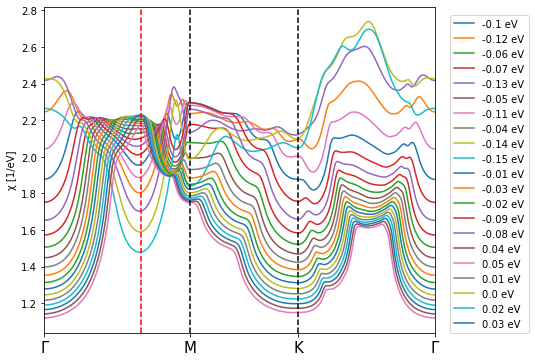

In [14]:
plt.figure(figsize=(7, 6))
for filename in os.listdir("export"):
    data = loadtxt(f"./export/{filename}")
    plt.plot(data,label=f"{filename[4:][:-4]} eV")
plt.xticks(ticks=sym, labels=label, fontsize=15)
plt.xlim(sym[0], len(band.T))
plt.axvline(sym[1], c="black", linestyle="--")
plt.axvline(sym[2], c="black", linestyle="--")
plt.axvline(sym[1]*2/3, c="red", linestyle="--")
plt.legend(loc=(1.04,0))
plt.ylabel("χ [1/eV]")
plt.show()

In [ ]:
plt.figure(figsize=(7, 6))
suscep = zeros(shape=(len(shift_search),len(path)))
for i in range(len(suscep)):
    model = TB(file_path,nscf="nscf.out", wout="NbSe2.wout",hr="NbSe2_hr.dat",shift=shift_search[i])
    mesh_energy = model.parallel_solver(mesh)[6]
    mesh_fermi = model.fermi(mesh_energy)
    sus_mesh = [ model.suscep(q, mesh,mesh_energy,mesh_fermi) for q in path ]
    suscep[i]=array(sus_mesh)
    plt.plot(suscep,label=f"{shift_search[i]}")
    plt.xticks(ticks=sym, labels=label, fontsize=15)
    plt.xlim(sym[0], len(band.T))
    plt.axvline(sym[1], c="black", linestyle="--")
    plt.axvline(sym[2], c="black", linestyle="--")
    plt.axvline(sym[1]*2/3, c="red", linestyle="--")

In [11]:
model = TB(file_path,nscf="nscf.out", wout="NbSe2.wout",hr="NbSe2_hr.dat",shift=0)
mesh = mesh_2d(200)
t_mesh = model.t_mesh(mesh)
mesh_energy = array(model.parallel_solver(mesh))
shift_search = around(arange(-0.15,-0.15,0.01),3)

In [64]:
shift_search = around(arange(-0.15,0.15,0.01),3)
suscep = zeros(shape=(len(shift_search),len(path)))

In [37]:
# shift_search = around(arange(-0.15,0.15,0.01),3)
# suscep = zeros(shape=(len(shift_search),len(path)))
# mesh = model.mesh_2d(250)
# for i in range(len(suscep)):
#     model = TB(file_path,nscf="nscf.out", wout="NbSe2.wout",hr="NbSe2_hr.dat",shift=shift_search[i])
#     mesh_energy = model.parallel_solver(mesh)[6]
#     mesh_fermi = model.fermi(mesh_energy)
#     sus_mesh = [ model.suscep(q, mesh,mesh_energy,mesh_fermi) for q in path ]
#     suscep[i]=array(sus_mesh)
#     savetxt(f"./export/sus_{shift_search[i]}.dat",suscep[i])

In [47]:
shift_search = around(arange(-0.15,0.15,0.01),3)

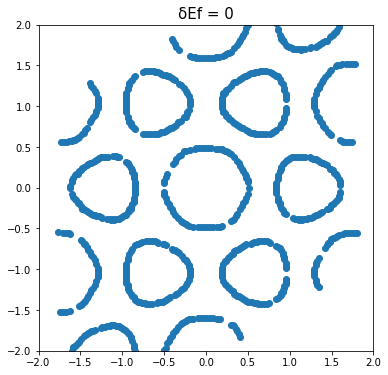

In [13]:
plot_fs(t_mesh,mesh_energy[6],fs_thickness=0.01,title=f"δEf = 0")


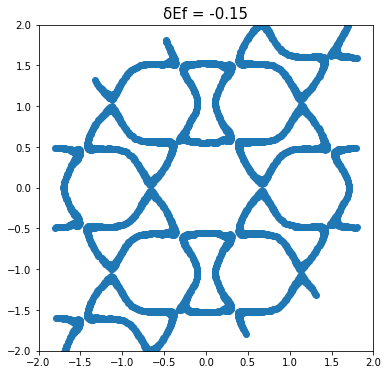

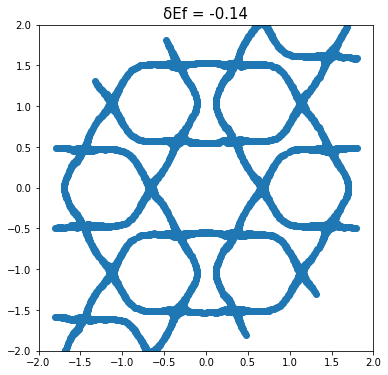

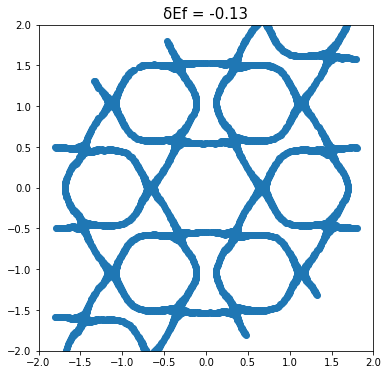

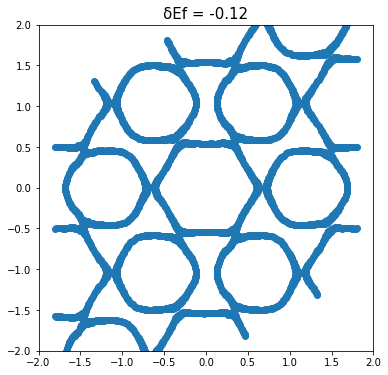

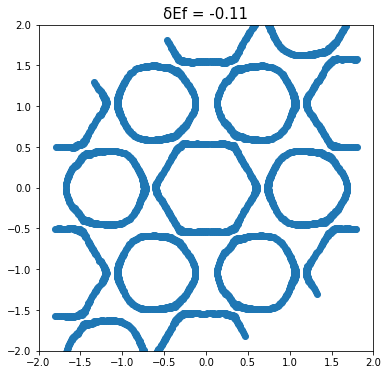

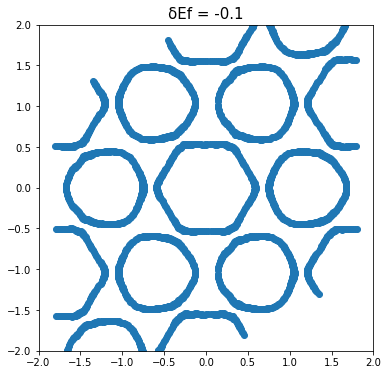

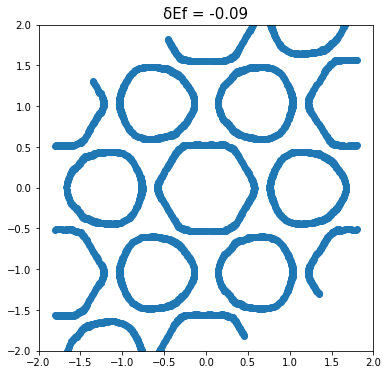

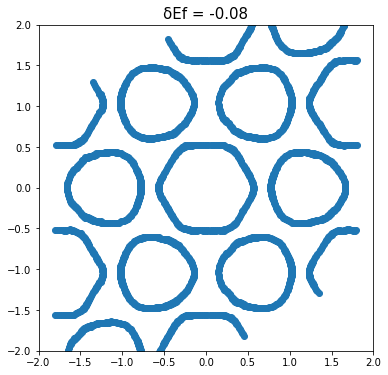

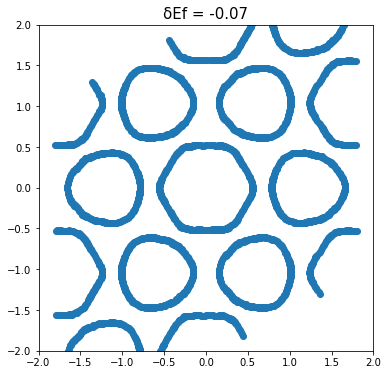

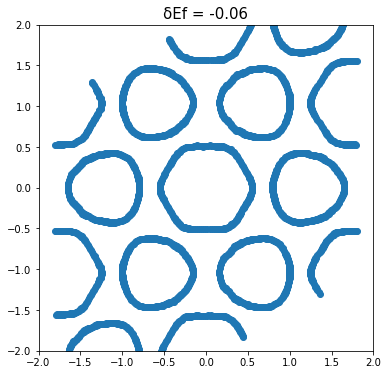

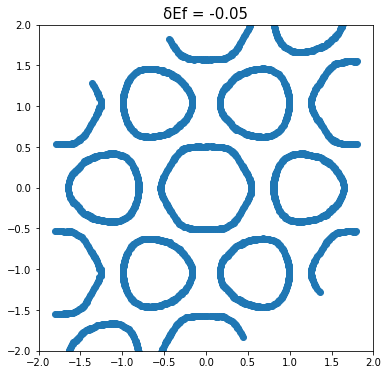

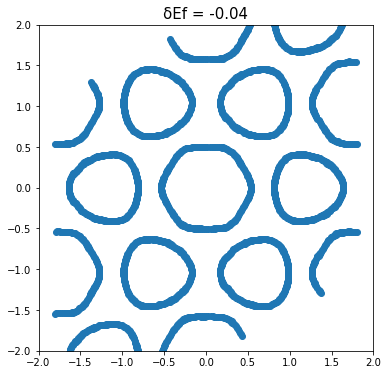

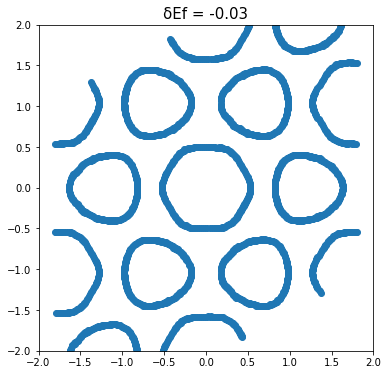

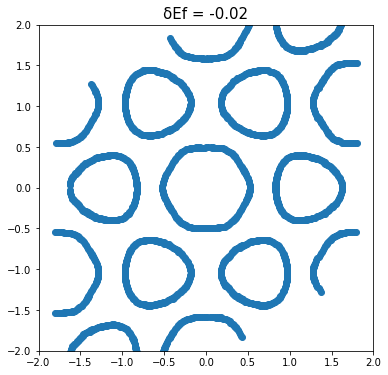

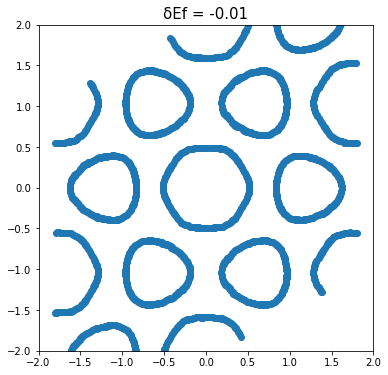

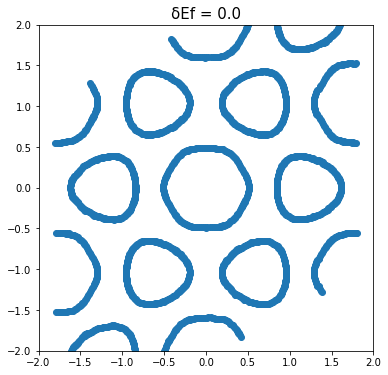

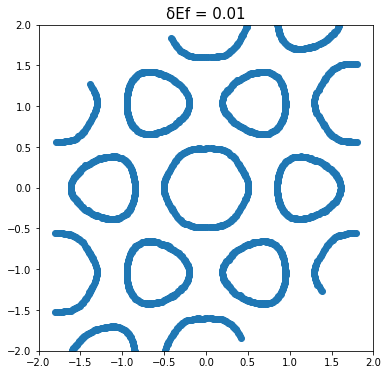

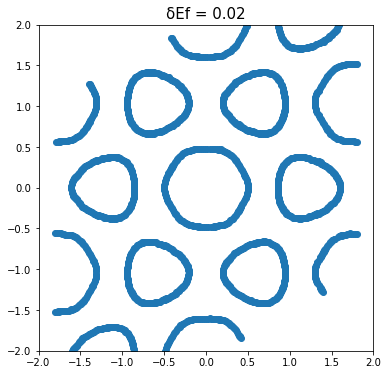

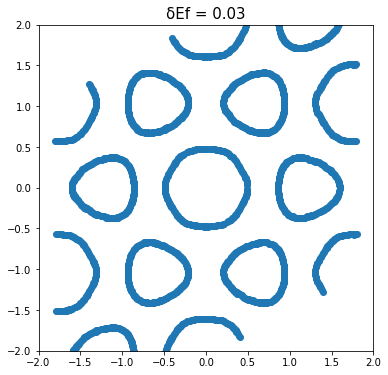

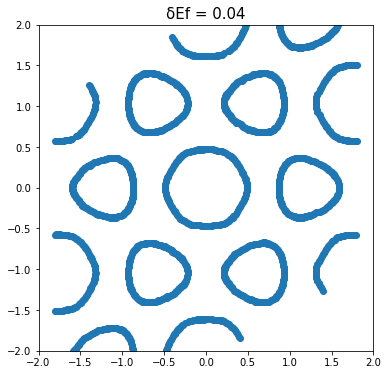

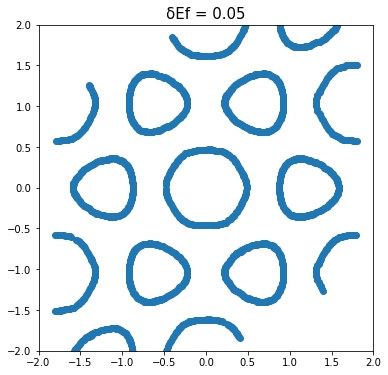

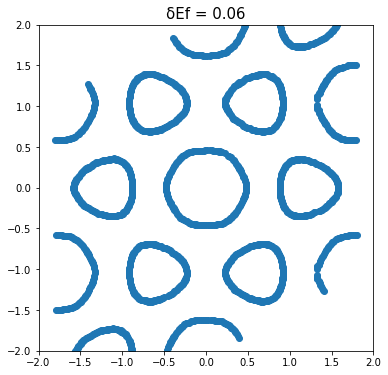

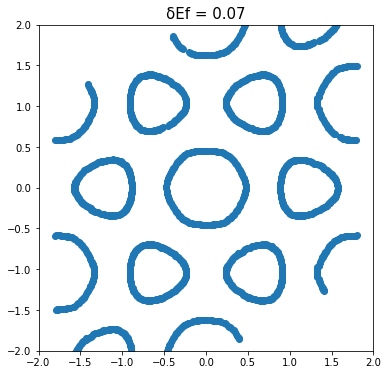

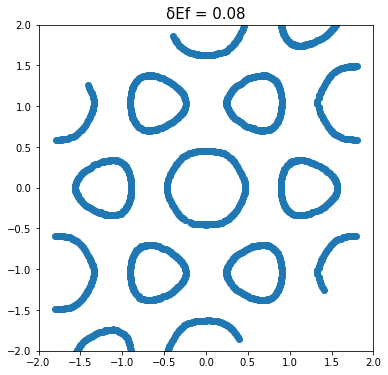

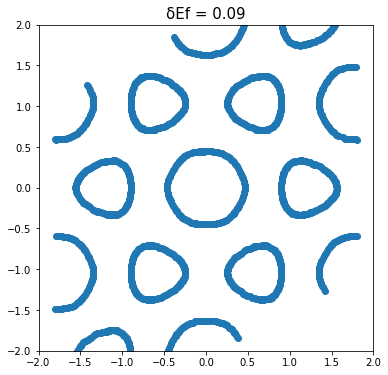

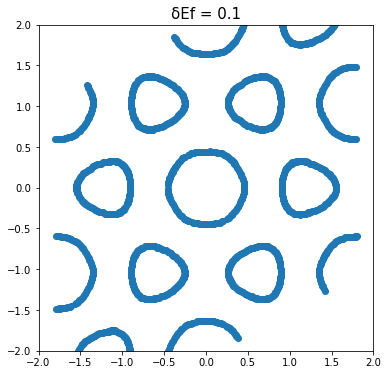

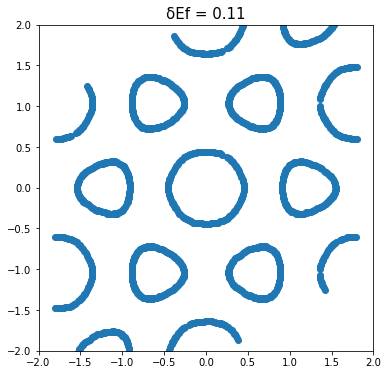

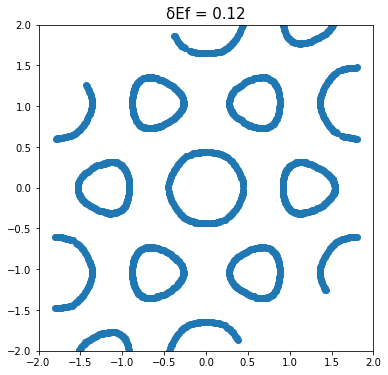

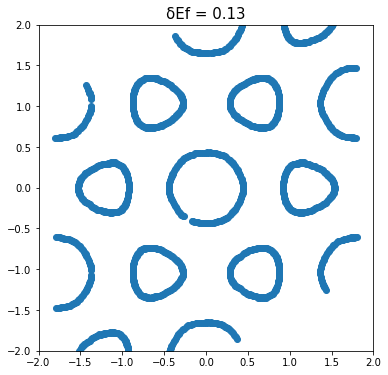

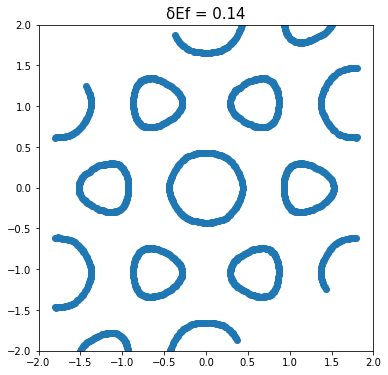

In [49]:
for i in shift_search:
    plot_fs(t_mesh,mesh_energy[6]-i,fs_thickness=0.01,title=f"δEf = {i}")

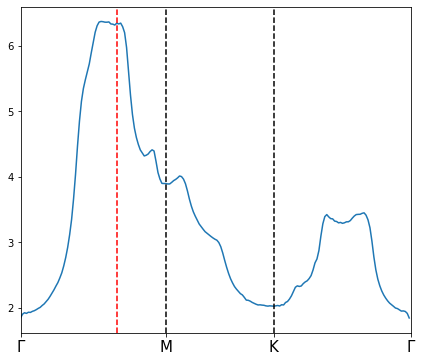

In [42]:
plt.figure(figsize=(7, 6))
U=0.3
plt.plot(array(sus_mesh)/(1-U*array(sus_mesh)))
plt.xticks(ticks=sym, labels=label, fontsize=15)
plt.xlim(sym[0], len(band.T))
plt.axvline(sym[1], c="black", linestyle="--")
plt.axvline(sym[2], c="black", linestyle="--")
plt.axvline(sym[1]*2/3, c="red", linestyle="--")
# plt.axhline(0, linestyle="--", color="red")
plt.show()

In [46]:
U = linspace(-1,1,100)

In [47]:
U

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [28]:
sym[1]*2/3

49.333333333333336

In [27]:
len(sus_mesh)

199